Well,now we will answer another two questions,we will dive into this dataset and built some insights...we can think like this way

Question1: How many films per each actor? and Does the more films the actor does the more profit the film aquire? in other words does the actors how made many films make great profit for their directors?  
to see that we will plot the top 100 actors and thier number of films and the profit which these films attained

Question2:

Does the more profitable actors make more popularity films? 
           

import some packages

In [4]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt


load data and cleaning it 

In [5]:
path="/content/tmdb-movies.csv"
df=pd.read_csv(path)
df.head()



,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


first we will see last 25's years to see the most dominant actor of this era 
so we will customize our dataframe from 1990 to 2015 

In [6]:
last_30_years=[*range(1960,1990)]
for i in last_30_years:
    df.drop(df[df["release_year"]==i].index,axis=0,inplace=True)
#adding the profit to our df
df["profit"]=df['revenue_adj']-df['budget_adj']


makeing a dictionary key=the actor ,value=the number of films and sort it 

In [7]:
df_cast=df["cast"].dropna(axis=0)
cast={}#empty dict
for i in range (df_cast.size):
  try:
    cast_list=df_cast[i].split(sep="|")#split the record to extract the words
    for j in (cast_list):
        if j in cast:
           cast[j]+=1
        else:
            cast[j]=0
  except:
      pass
#sort the dict in descending order
cast_sorted={k: v for k, v in sorted(cast.items(), key=lambda item: item[1],reverse = True)}
cast_sorted=list(cast_sorted.items())[:100] #select the first 100 item to plot them



plotint each actor on x-axis and the # of films on y-axis

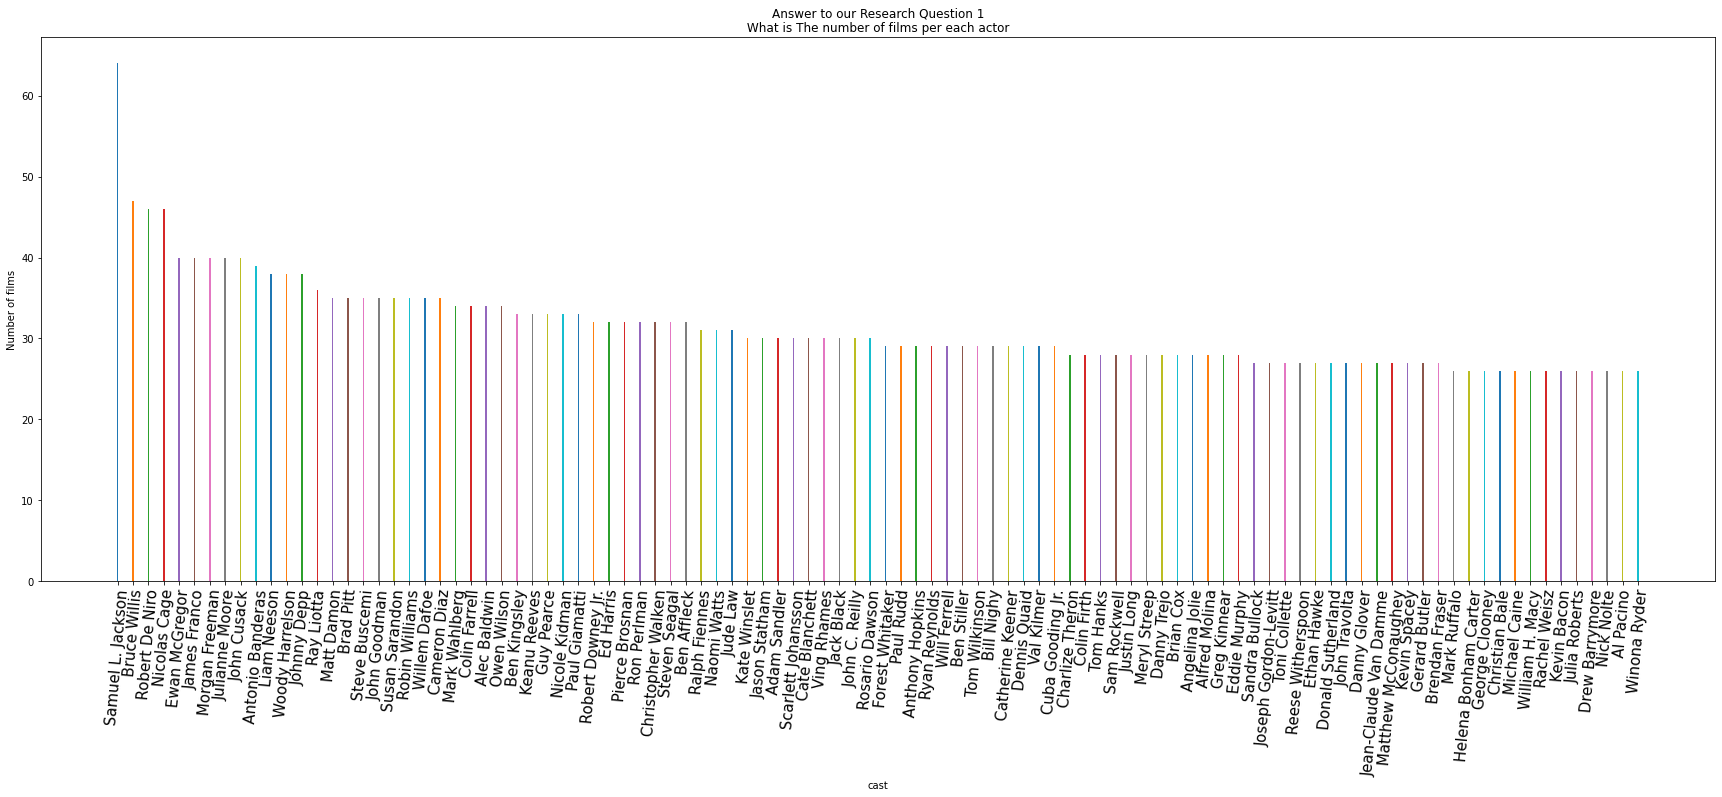

In [8]:
plt.figure(figsize=(30, 10))
for i in range (len(cast_sorted)):
  rects1=plt.bar(cast_sorted[i][0],cast_sorted[i][1],0.1)
plt.xticks(rotation=85, fontsize=15)
plt.xlabel("cast")
plt.ylabel('Number of films')
plt.title("Answer to our Research Question 1\n What is The number of films per each actor ")
plt.show()

from the previous figure we can see the most actor with the great number of films is samual l.jackson then bruse willis,...and so on but to answer the second question which say 

Does the more films the actor does the more profit the film aquire?

to answer this question we will plot each actor with the profit of the whole films he acted in?

In [9]:
actors=[]#we will put the 100 actor in actors_list
for actor in cast_sorted:
  actors.append(actor[0])
actor_profit={}#empty dict to put key=actor , value=the whole profit from all films
for actor in actors:
  actor_profit[actor]=0#to set all keys to zero for each actor and start adding
for actor in actors:
  for i in range(df["cast"].size):
      try:
        if (actor in df["cast"][i]): 
          actor_profit[actor]+=df["profit"][i]#here we check if actor in the cast of this film then we add the profit to the actor finally we get the
                                              #whole profit for each actor
      except:
        pass
#sorting it 
actor_profit_sorted={k: v for k, v in sorted(actor_profit.items(), key=lambda item: item[1],reverse = True)}
actor_profit_sorted=list(actor_profit_sorted.items())
  

ploting each actor on x-axis and whole profit on y-axis

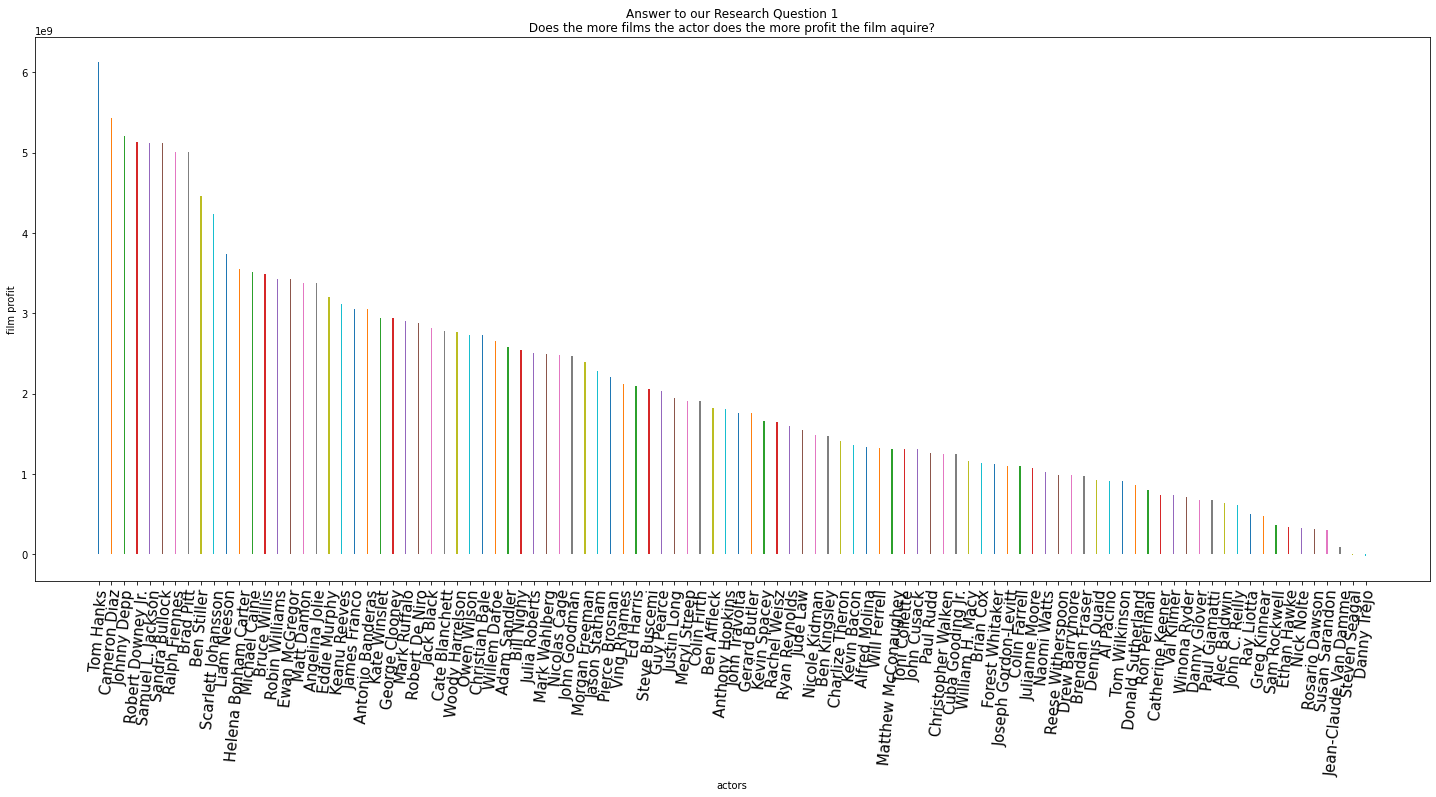

In [25]:
plt.figure(figsize=(25, 10))
for i in range (len(actor_profit_sorted)):
  rects1=plt.bar(actor_profit_sorted[i][0],actor_profit_sorted[i][1],0.1)
plt.xticks(rotation=85, fontsize=15)
plt.xlabel("actors")
plt.ylabel('film profit')
plt.title("Answer to our Research Question 1\n Does the more films the actor does the more profit the film aquire? ")
plt.show()

The conclusion:
from these prievious plots we can see almost the first 20 actor with high movies number,thier films tend to attain more profit 

*****************************************************************************

Well let's dive deeper into our dataset and see ..
Does the prievious 100 actors make more popularity films? 


In [23]:
cast_sorted={k: v for k, v in sorted(cast.items(), key=lambda item: item[1],reverse = True)}
cast_sorted=list(cast_sorted.items())[:100]
actors=[]

for actor in cast_sorted:
  actors.append(actor[0])

popularity_actor={}
for actor in actors:
  popularity_actor[actor]={"rate":0,'count':0}  #intialize popularity_actor dict with "rate":0,'count':0
for actor in actors:
  for i in range(df["cast"].size):
      try:
        if (actor in df["cast"][i]): 
          popularity_actor[actor]["rate"]+=df['popularity'][i]#adding popularity to each actor 
          popularity_actor[actor]['count']+=1                 #count and adding 1
      except:
        pass

popularity_actor1={}
average_popularity_actor
for actor in actors:
  average_popularity_actor[actor]=popularity_actor[actor]['rate']/popularity_actor[actor]['count']
averag_popularity_actor_sorted={k: v for k, v in sorted(average_popularity_actor.items(), key=lambda item: item[1],reverse = True)}
averag_popularity_actor_sorted=list(averag_popularity_actor_sorted.items())



we will plot actors on the x-axis and average popularity films on y-axis

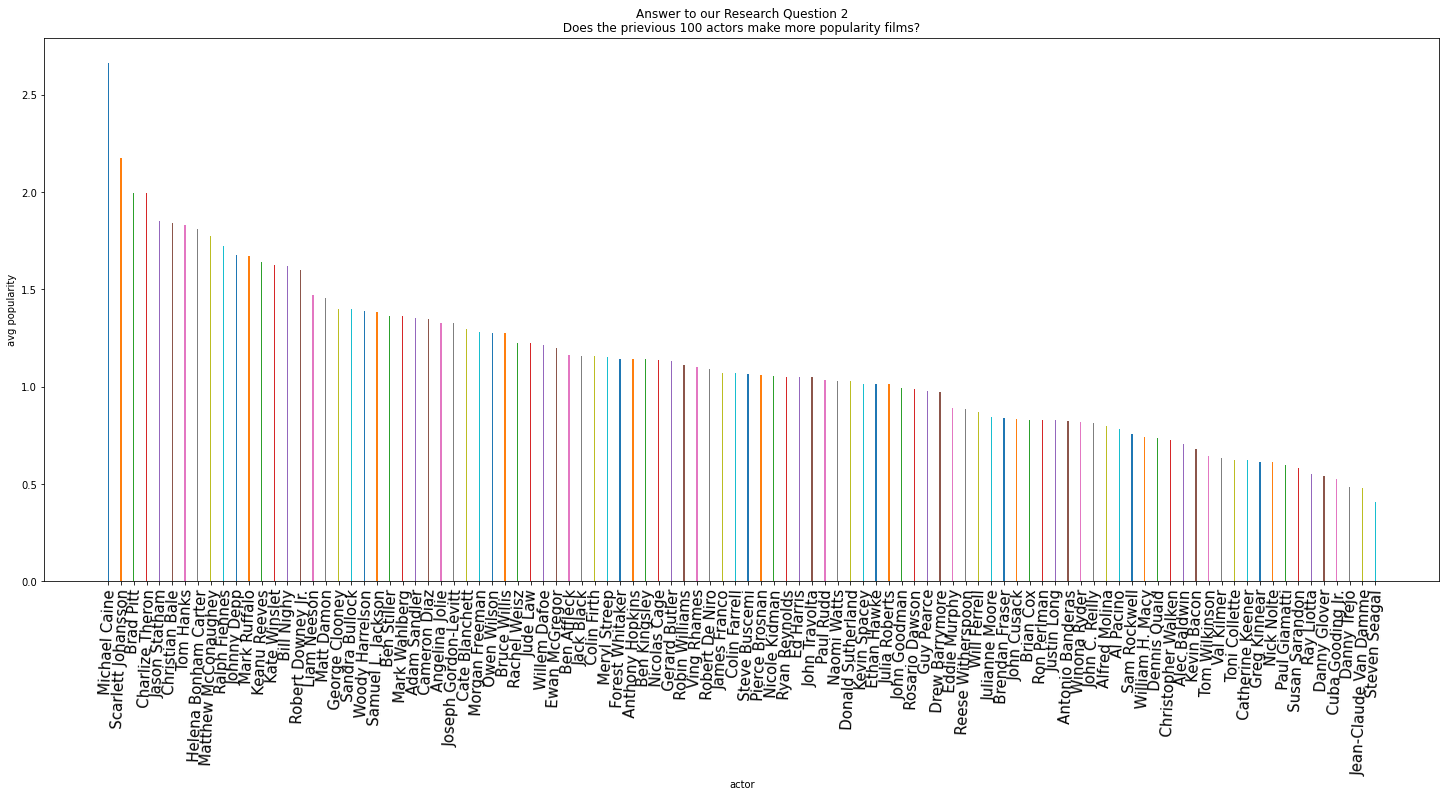

In [26]:
plt.figure(figsize=(25, 10))
for i in range (len(popularity_actor1_sorted)):
  rects1=plt.bar(averag_popularity_actor_sorted[i][0],averag_popularity_actor_sorted[i][1],0.1)
plt.xticks(rotation=87.5, fontsize=15)
plt.xlabel("actor")
plt.ylabel('avg popularity')
plt.title("Answer to our Research Question 2\n Does the prievious 100 actors make more popularity films? ")
plt.show()

We see that almost more profitable actors make more familiar films 